In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import make_pipeline 

import warnings 
warnings.filterwarnings('ignore')

In [2]:
sumo = pd.read_csv("data.csv")
sumo.head(n=10)

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,roughness,tension_strenght,elongation
0,0.02,8,90,grid,220,60,40,abs,0,25,18,1.2
1,0.02,7,90,honeycomb,225,65,40,abs,25,32,16,1.4
2,0.02,1,80,grid,230,70,40,abs,50,40,8,0.8
3,0.02,4,70,honeycomb,240,75,40,abs,75,68,10,0.5
4,0.02,6,90,grid,250,80,40,abs,100,92,5,0.7
5,0.02,10,40,honeycomb,200,60,40,pla,0,60,24,1.1
6,0.02,5,10,grid,205,65,40,pla,25,55,12,1.3
7,0.02,10,10,honeycomb,210,70,40,pla,50,21,14,1.5
8,0.02,9,70,grid,215,75,40,pla,75,24,27,1.4
9,0.02,8,40,honeycomb,220,80,40,pla,100,30,25,1.7


In [3]:
sumo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   layer_height        50 non-null     float64
 1   wall_thickness      50 non-null     int64  
 2   infill_density      50 non-null     int64  
 3   infill_pattern      50 non-null     object 
 4   nozzle_temperature  50 non-null     int64  
 5   bed_temperature     50 non-null     int64  
 6   print_speed         50 non-null     int64  
 7   material            50 non-null     object 
 8   fan_speed           50 non-null     int64  
 9   roughness           50 non-null     int64  
 10  tension_strenght    50 non-null     int64  
 11  elongation          50 non-null     float64
dtypes: float64(2), int64(8), object(2)
memory usage: 4.8+ KB


In [4]:
sumo.describe()

,layer_height,wall_thickness,infill_density,nozzle_temperature,bed_temperature,print_speed,fan_speed,roughness,tension_strenght,elongation
count,50.000000,50.000000,50.00000,50.000000,50.000000,50.0000,50.000000,50.000000,50.000000,50.000000
mean,0.106000,5.220000,53.40000,221.500000,70.000000,64.0000,50.000000,170.580000,20.080000,1.672000
std,0.064397,2.922747,25.36348,14.820353,7.142857,29.6923,35.714286,99.034129,8.925634,0.788188
min,0.020000,1.000000,10.00000,200.000000,60.000000,40.0000,0.000000,21.000000,4.000000,0.400000
25%,0.060000,3.000000,40.00000,210.000000,65.000000,40.0000,25.000000,92.000000,12.000000,1.100000
50%,0.100000,5.000000,50.00000,220.000000,70.000000,60.0000,50.000000,165.500000,19.000000,1.550000
75%,0.150000,7.000000,80.00000,230.000000,75.000000,60.0000,75.000000,239.250000,27.000000,2.175000
max,0.200000,10.000000,90.00000,250.000000,80.000000,120.0000,100.000000,368.000000,37.000000,3.300000


In [5]:
sumo.loc[sumo.duplicated()]

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,roughness,tension_strenght,elongation


In [6]:
sumo.count()

layer_height          50
wall_thickness        50
infill_density        50
infill_pattern        50
nozzle_temperature    50
bed_temperature       50
print_speed           50
material              50
fan_speed             50
roughness             50
tension_strenght      50
elongation            50
dtype: int64

In [7]:
target=[]
for i in sumo['elongation']:
    if i<=1 :
        target.append('0')
    elif i>1 and i<=2 :
        target.append('1')
    elif i>2 :
        target.append('2')
        
sumo['Target']=target    

In [8]:
sumo.head(n=15)

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,roughness,tension_strenght,elongation,Target
0,0.02,8,90,grid,220,60,40,abs,0,25,18,1.2,1
1,0.02,7,90,honeycomb,225,65,40,abs,25,32,16,1.4,1
2,0.02,1,80,grid,230,70,40,abs,50,40,8,0.8,0
3,0.02,4,70,honeycomb,240,75,40,abs,75,68,10,0.5,0
4,0.02,6,90,grid,250,80,40,abs,100,92,5,0.7,0
5,0.02,10,40,honeycomb,200,60,40,pla,0,60,24,1.1,1
6,0.02,5,10,grid,205,65,40,pla,25,55,12,1.3,1
7,0.02,10,10,honeycomb,210,70,40,pla,50,21,14,1.5,1
8,0.02,9,70,grid,215,75,40,pla,75,24,27,1.4,1
9,0.02,8,40,honeycomb,220,80,40,pla,100,30,25,1.7,1


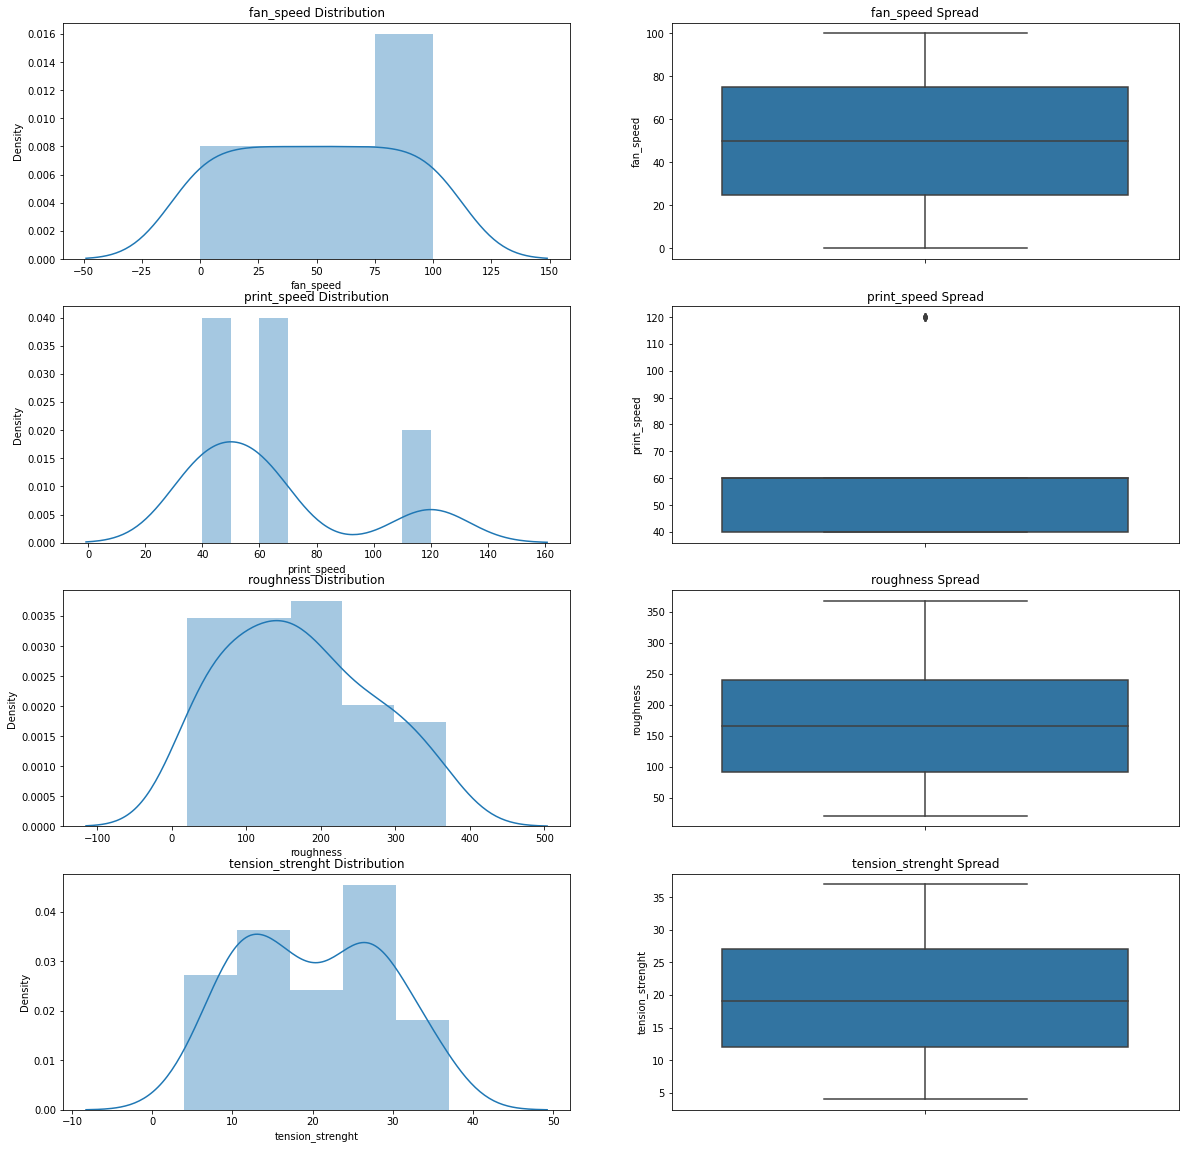

In [9]:
plt.figure(figsize=(20,20))

def make(x,fig):
    plt.subplot(4,2,fig)
    plt.title(x+' Distribution')
    sns.distplot(sumo[x])
    plt.subplot(4,2,fig+1)
    plt.title(x+' Spread')
    sns.boxplot(y=sumo[x])
    
make('fan_speed',1)
make('print_speed',3)
make('roughness',5)
make('tension_strenght',7)
plt.show()

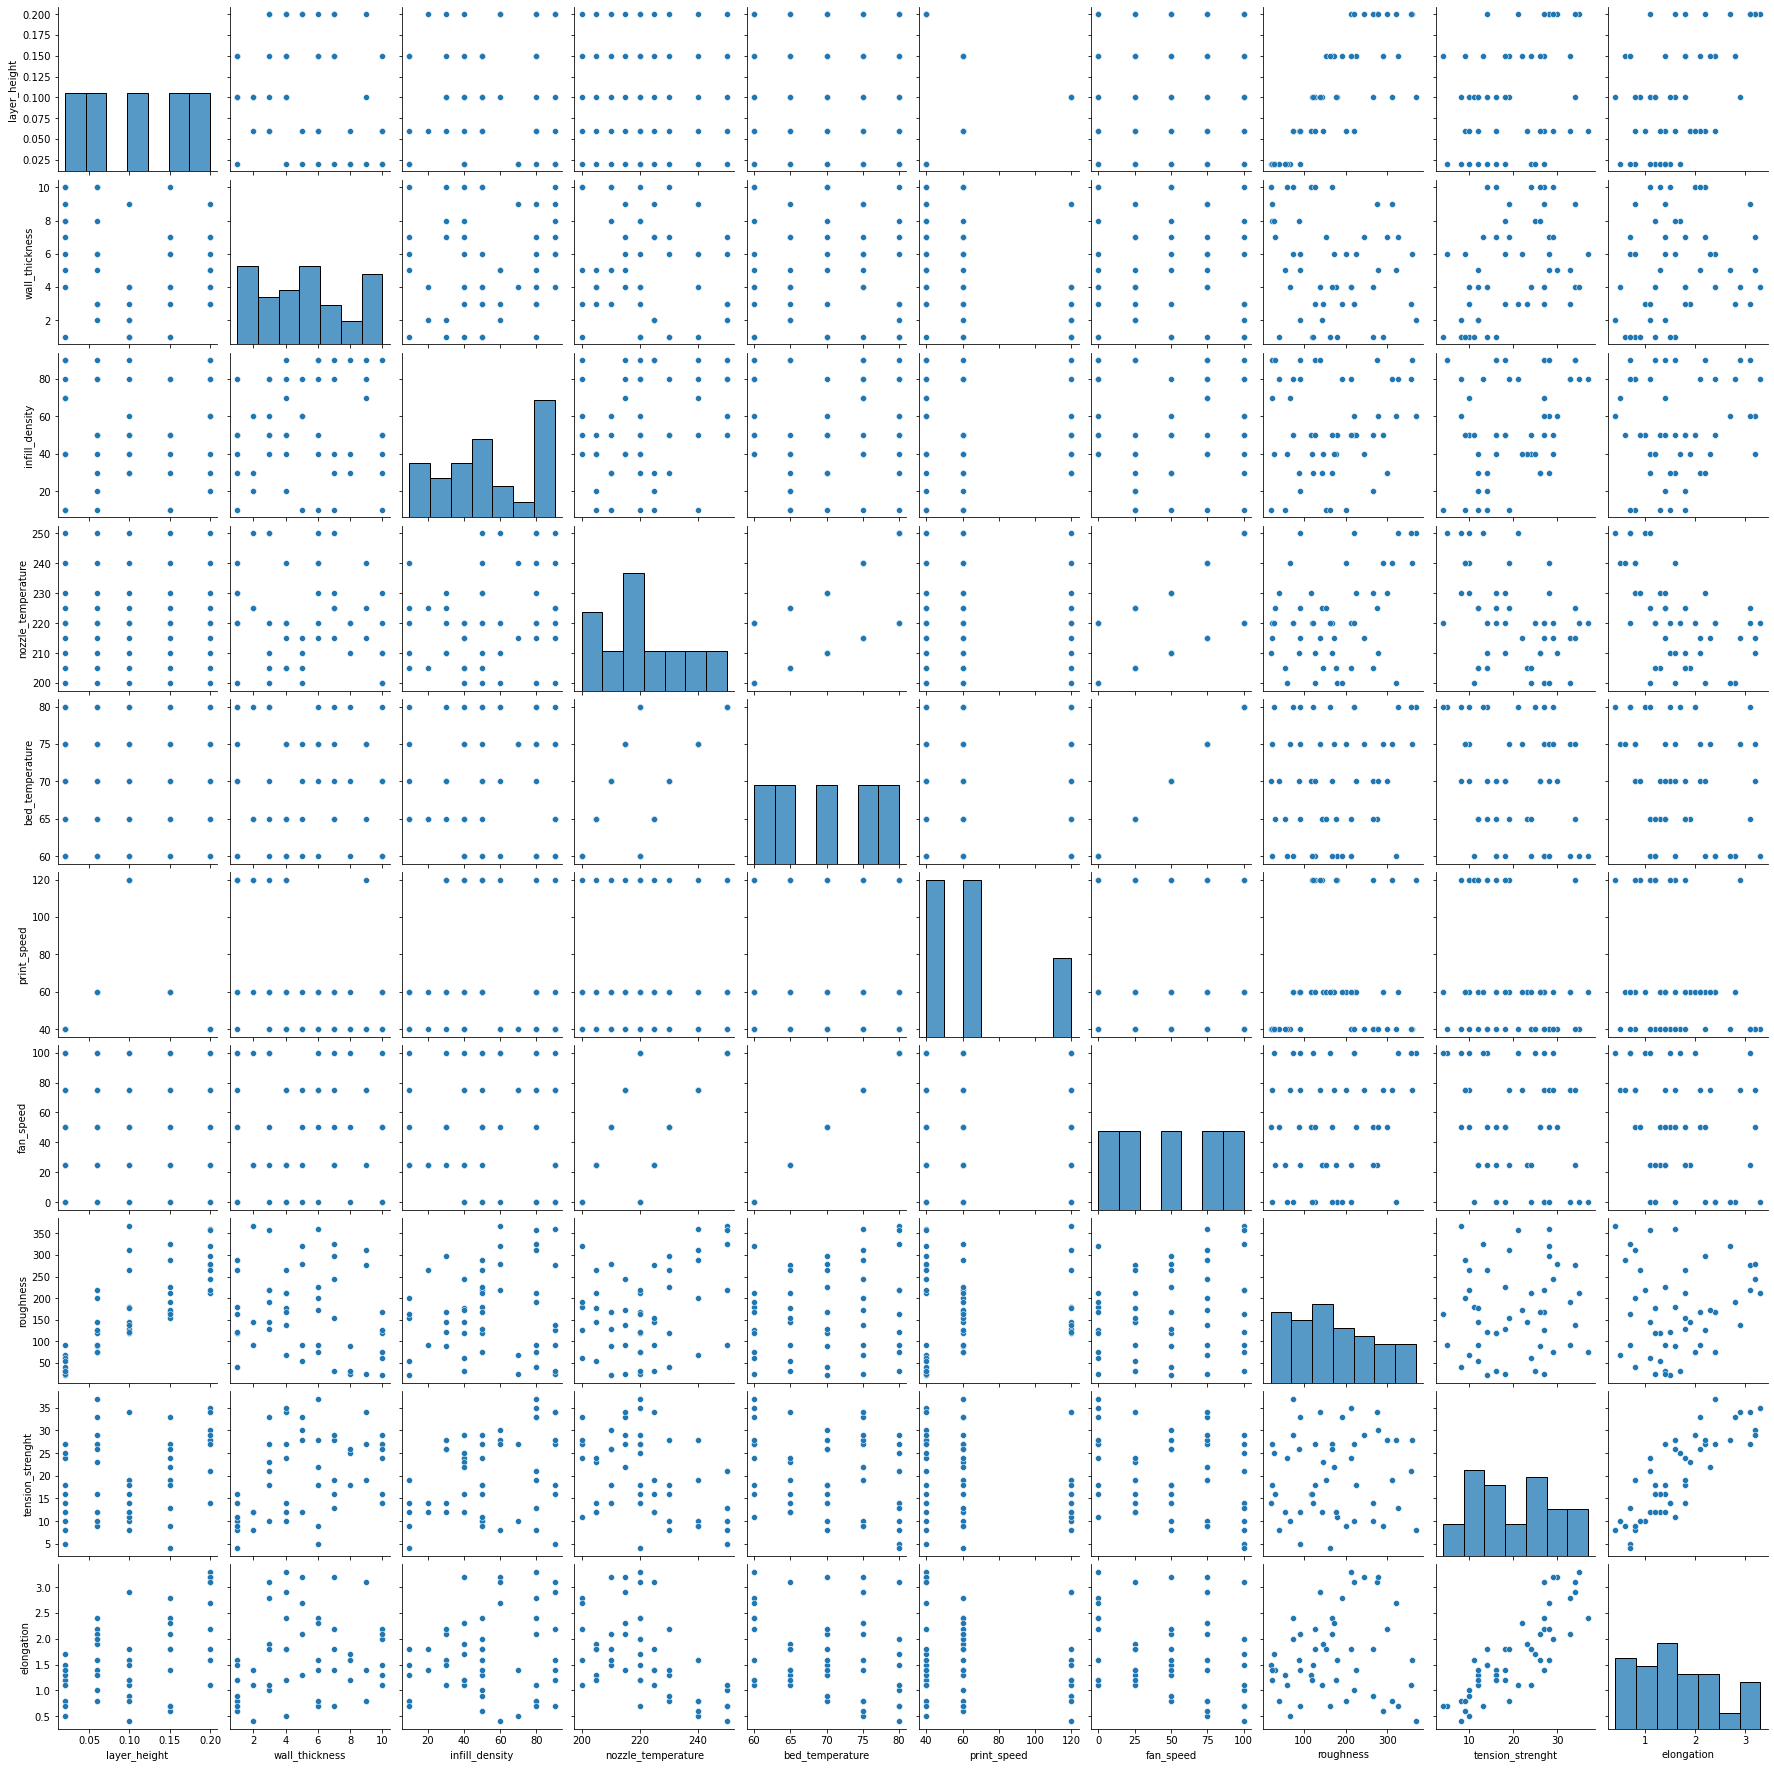

In [10]:
sns.pairplot(sumo)
plt.show()

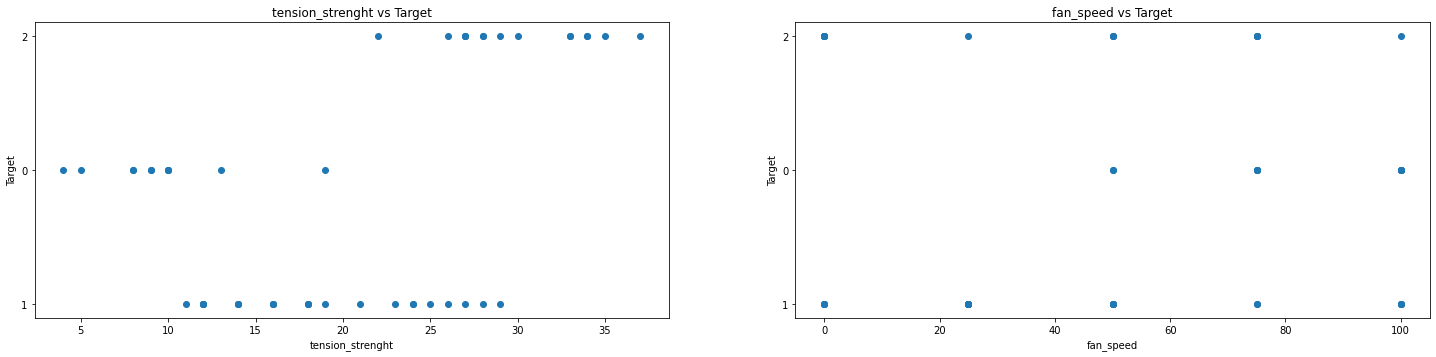

In [11]:
def shu(x,fig):
    plt.subplot(4,2,fig)
    plt.scatter(sumo[x],sumo['Target'])
    plt.title(x+' vs Target')
    plt.ylabel('Target')
    plt.xlabel(x)
    
plt.figure(figsize=(25,25))

shu('tension_strenght',1)
shu('fan_speed',2)
plt.show()

In [12]:
sumo.drop('infill_pattern',inplace=True,axis=1)


In [16]:
sumo.drop('material',inplace=True,axis=1)

In [17]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [18]:
X=sumo.iloc[:,0:11]
y=sumo.iloc[:,-1]

In [19]:
bestfeatures = SelectKBest(score_func=chi2,k=10)
fit = bestfeatures.fit(X,y)
dfscores=pd.DataFrame(fit.scores_)
dfcolumns=pd.DataFrame(X.columns)
featureScores=pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']
print(featureScores.nlargest(10,'Score'))

                 Specs       Score
7            roughness  377.986946
6            fan_speed  289.081439
8     tension_strenght  136.553506
2       infill_density   66.363636
5          print_speed   31.287879
10              Target   23.777778
3   nozzle_temperature   22.208427
9           elongation   15.349792
4      bed_temperature    8.259470
1       wall_thickness    6.257634


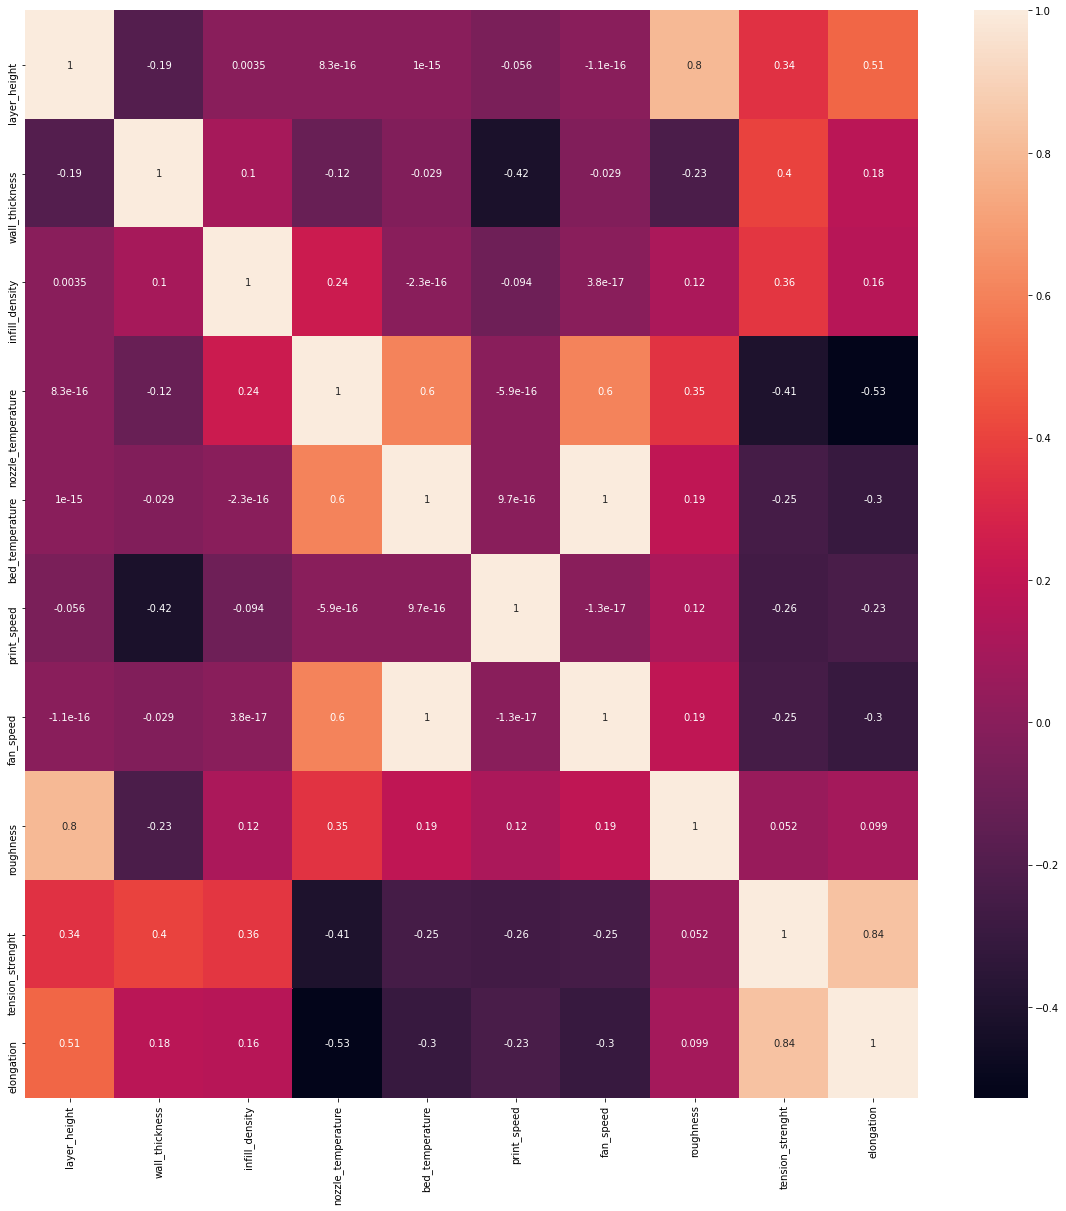

In [20]:
plt.figure(figsize=(20,20))
sns.heatmap(sumo.corr(),annot=True)
plt.show()

In [32]:
X = sumo.drop('Target',axis=1)
y = sumo.Target
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=42)

In [33]:
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=20)

In [34]:
knn.score(X_test,y_test)

0.625

In [35]:
model1 = make_pipeline(StandardScaler(),KNeighborsClassifier(n_neighbors=20))
model1.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=20))])

In [36]:
model1.score(X_test,y_test)

0.625

In [37]:
from sklearn.ensemble import RandomForestRegressor
model2 = make_pipeline(StandardScaler(),RandomForestRegressor())
model2.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor', RandomForestRegressor())])

In [38]:
model2.score(X_test,y_test)

0.9989538461538462